<a href="https://colab.research.google.com/github/Muhammadridho100902/google_collab/blob/main/Water_Potability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/water_potability.csv')

In [ ]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
def checking_missing_value(df):
    
    m = df.isna().sum()
    total = int(df.shape[0])

    for i in range(len(df.columns)):
        percentage = round((m[i]/total)*100)

        print(str(df.columns[i]) + ' has ' + str(percentage) +
              ' % missing value(' + str(m[i]) + ')')

checking_missing_value(data)

ph has 15 % missing value(491)
Hardness has 0 % missing value(0)
Solids has 0 % missing value(0)
Chloramines has 0 % missing value(0)
Sulfate has 24 % missing value(781)
Conductivity has 0 % missing value(0)
Organic_carbon has 0 % missing value(0)
Trihalomethanes has 5 % missing value(162)
Turbidity has 0 % missing value(0)
Potability has 0 % missing value(0)


In [ ]:
data = data.dropna(axis=0)

In [ ]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
data = data[(data['ph'] >=4) & (data['ph'] <= 10)]
data = data[(data['Hardness'] >=127) & (data['Hardness'] <= 260)]
data = data[data['Solids'] <= 42000]
data = data[(data['Chloramines'] >=4) & (data['Chloramines'] <= 10)]
data = data[(data['Sulfate'] >=250) & (data['Sulfate'] <= 420)]
data = data[data['Conductivity'] <= 630]
data = data[(data['Organic_carbon'] >=6) & (data['Organic_carbon'] <= 22)]
data = data[(data['Trihalomethanes'] >=25) & (data['Trihalomethanes'] <= 105)]
data = data[(data['Turbidity'] >=2) & (data['Turbidity'] <= 6)]


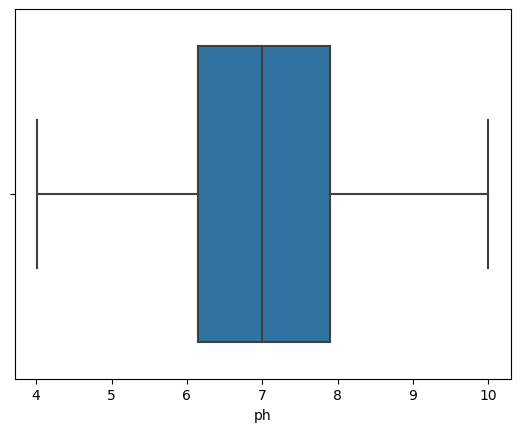

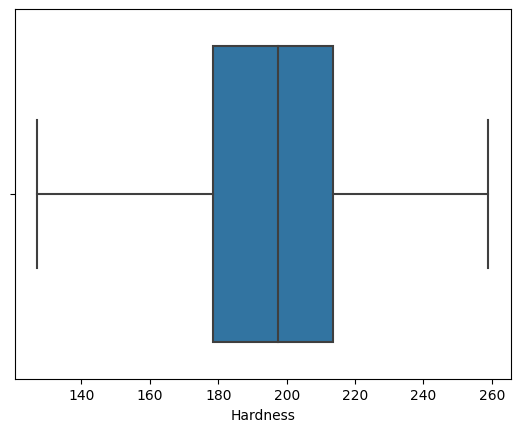

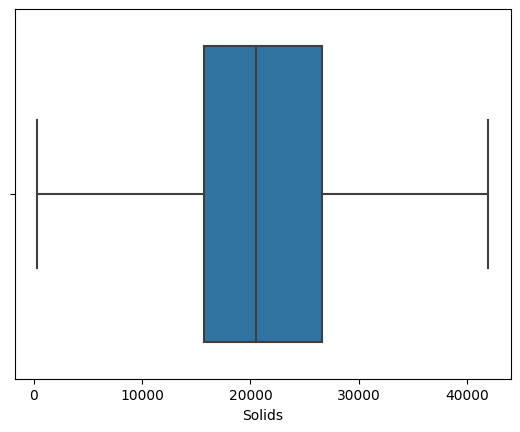

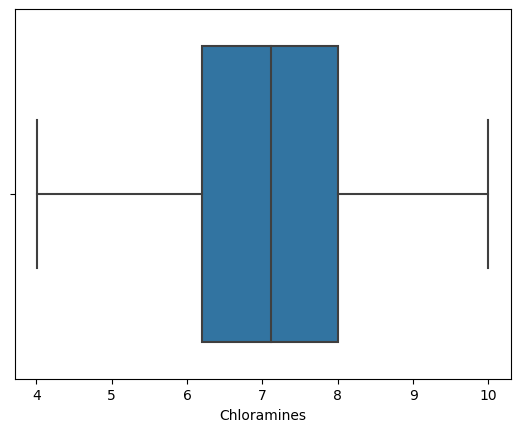

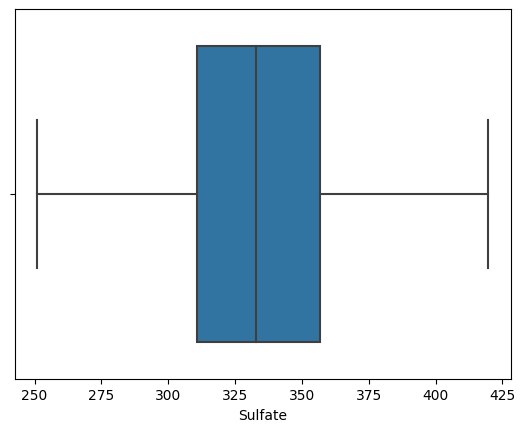

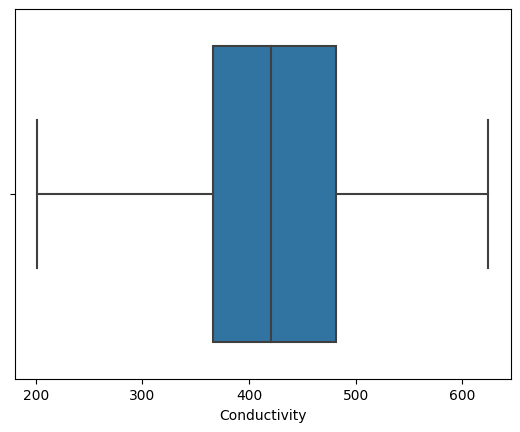

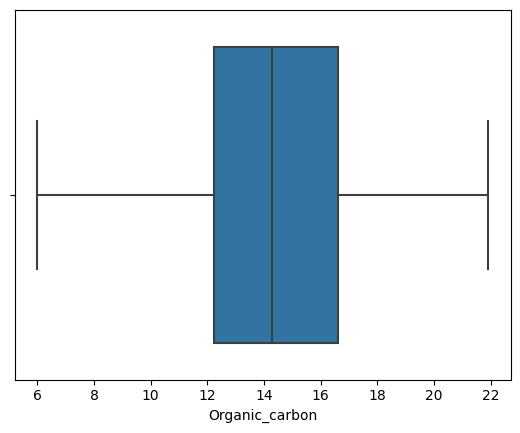

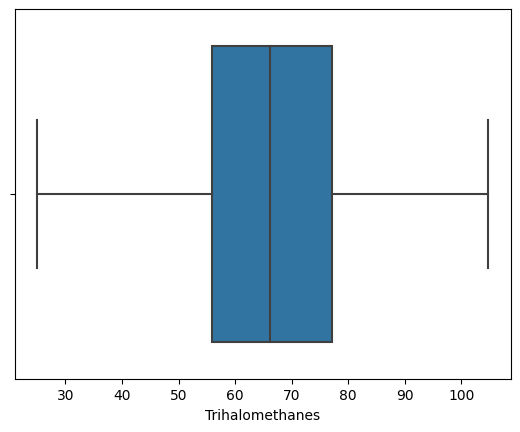

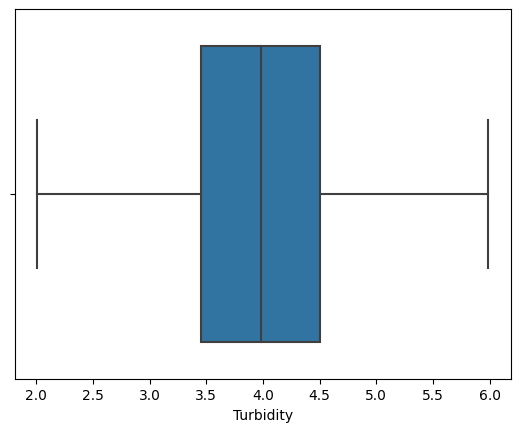

In [ ]:
columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

for i in columns:
  sns.boxplot(data=data, x= i)
  plt.show()

In [ ]:
x = data.drop('Potability', axis = 1)
y = data['Potability']

y

3       0
4       0
5       0
7       0
10      0
       ..
3264    1
3265    1
3267    1
3268    1
3270    1
Name: Potability, Length: 1521, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

print(f'X_train: {x_train.shape}')
print(f'X_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')


X_train: (1216, 9)
X_test: (305, 9)
y_train: (1216,)
y_test: (305,)


Normalize Features

In [ ]:
from sklearn.preprocessing import StandardScaler

n_scaler = ['Hardness', 'Solids', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes']

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# XGBoost

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier

# xg = XGBClassifier()

# param_grid = {
#     'n_estimators' : [100,200],
#     'max_depth' : [3,5,7],
#     'learning_rate' : [0.1, 0.01, 0.001],
#     'gamma' : [0, 0.1, 0.2]
# }

# grid_search = GridSearchCV(xg, param_grid, cv=5)
# grid_search.fit(x_train, y_train)

# print(grid_search.best_params_)

In [ ]:
# xg = XGBClassifier(gamma=0, learning_rate=0.01, max_depth = 5, n_estimators = 200)
# xg.fit(x_train,y_train)

In [ ]:
# from sklearn.metrics import accuracy_score

# y_pred= xg.predict(x_test)
# print('Accuracy Score :', round(accuracy_score(y_test, y_pred) * 100, 2), '%')

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train, y_train)
clf_pred = clf.predict(x_test)

# GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)

# XBG Classifier

In [ ]:
from xgboost import XGBClassifier, XGBRegressor

xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_test)

# SVM

In [ ]:
# from sklearn import svm as svm

# sm = svm.SVC()
# sm.fit(x_train, y_train)
# sm_pred = sm.predict(x_test)

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']} 

# grid_search = GridSearchCV(sm, param_grid, cv=5)
# grid_search.fit(x_train, y_train)

# print(grid_search.best_params_)



In [ ]:
from sklearn import svm as svm

sm = svm.SVC(random_state=1)
sm.fit(x_train, y_train)
sm_pred = sm.predict(x_test)

# Evaluation Model

In [ ]:
from sklearn.metrics import mean_squared_error

clf_mse = mean_squared_error(y_test, clf_pred) * 100
gnb_mse = mean_squared_error(y_test, gnb_pred) * 100
xgb_mse = mean_squared_error(y_test, xgb_pred) * 100
gbc_mse = mean_squared_error(y_test, gbc_pred) * 100
svm_mse = mean_squared_error(y_test, sm_pred) * 100


print(f'MSE CLF: {clf_mse}')
print(f'MSE GNB: {gnb_mse}')
print(f'MSE XGB: {xgb_mse}')
print(f'MSE GBC: {gbc_mse}')
print(f'MSE svm: {svm_mse}')



MSE CLF: 37.704918032786885
MSE GNB: 38.0327868852459
MSE XGB: 38.36065573770492
MSE GBC: 35.73770491803279
MSE svm: 37.704918032786885


In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, gbc_pred)
print(acc)

0.6426229508196721


In [ ]:
# submit.head()

In [ ]:
# submit.to_excel('Submit.xlsx', sheet_name='Sheet1')